In [1]:
#Modeling - Initial time based modeling
#Goal of this notebook is to read in a training file, select out a sport from the activities,
#Plot it and predict on what the performance at a later date will be.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

In [152]:
#Let's read in a single csv first:
race_df = pd.read_csv('./data/races/athlete_3/athlete_3_race_4_3_mo_Running_extra_cols.csv', index_col='date')

In [153]:
race_df.head()

,Unnamed: 0,index,activity_type,favorite,title,distance,calories,time,avg_hr,max_hr,...,max_resp,athlete_id,filetype,is_race,ft_per_mile,intensity,spd_ft_s,spd_mph,GAP_ft_s,GAP_by_intensity
date,,,,,,,,,,,,,,,,,,,,,
2019-04-25,0,0,Running,False,Fresno Running,4.40,496,00:35:02,138,155,...,0,3,garmin,0,8.181818,0.745946,11.069182,7.547170,11.069196,14.839139
2019-04-27,1,4,Running,False,Boulder Running,2.59,320,00:20:02,147,165,...,0,3,garmin,0,41.698842,0.794595,11.379310,7.758621,11.379665,14.321347
2019-04-28,2,5,Running,False,Denver Running,12.64,"1,453",01:38:16,149,171,...,0,3,garmin,0,45.965190,0.805405,11.306210,7.708779,11.306638,14.038443
2019-04-30,3,11,Running,False,Denver Running,6.53,736,00:50:03,142,154,...,0,3,garmin,0,18.070444,0.767568,11.478261,7.826087,11.478328,14.954160
2019-05-02,4,15,Running,False,Denver Running,6.17,644,00:50:18,136,159,...,0,3,garmin,0,47.811994,0.735135,10.797546,7.361963,10.797989,14.688441


In [154]:
race_df[race_df['is_race'] == 1]

,Unnamed: 0,index,activity_type,favorite,title,distance,calories,time,avg_hr,max_hr,...,max_resp,athlete_id,filetype,is_race,ft_per_mile,intensity,spd_ft_s,spd_mph,GAP_ft_s,GAP_by_intensity
date,,,,,,,,,,,,,,,,,,,,,


In [19]:
#Great, I have a 3 month train set. Race is a half marathon at 1:27:20 time.

In [155]:
race_df['elev_gain'] = race_df['elev_gain'].str.replace(',', '').astype(float)


AttributeError: Can only use .str accessor with string values!

In [157]:
race_df['elev_loss'] = race_df['elev_loss'].str.replace(',', '').astype(float)


In [158]:
race_df['calories'] = race_df['calories'].str.replace(',', '').astype(float)

In [159]:
race_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 2019-04-25 to 2019-07-25
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                51 non-null     int64  
 1   index                     51 non-null     int64  
 2   activity_type             51 non-null     object 
 3   favorite                  51 non-null     bool   
 4   title                     51 non-null     object 
 5   distance                  51 non-null     float64
 6   calories                  51 non-null     float64
 7   time                      51 non-null     object 
 8   avg_hr                    51 non-null     int64  
 9   max_hr                    51 non-null     int64  
 10  aerobic_te                51 non-null     float64
 11  avg_run_cadence           51 non-null     int64  
 12  max_run_cadence           51 non-null     int64  
 13  avg_pace                  51 non-null     object 
 14  

In [20]:
import pmdarima as pmd

In [21]:
from pmdarima.utils import tsdisplay

/Users/Keith/miniconda3/lib/python3.8/site-packages/pmdarima/utils/visualization.py:219: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


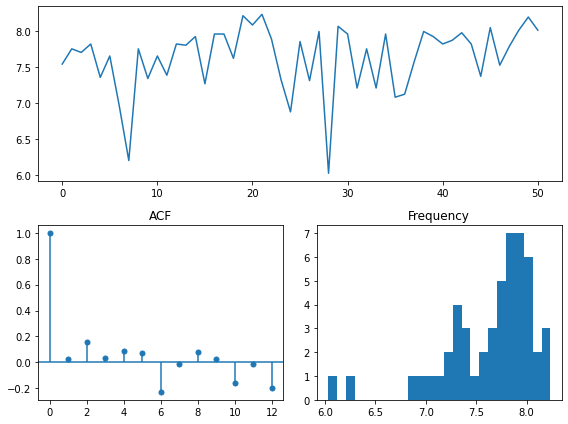

In [160]:
tsdisplay(race_df['spd_mph'], lag_max=12)

/Users/Keith/miniconda3/lib/python3.8/site-packages/pmdarima/utils/visualization.py:219: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


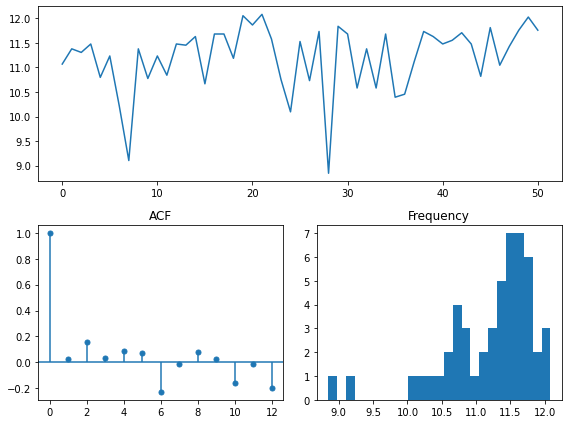

In [161]:
tsdisplay(race_df['GAP_ft_s'], lag_max=12)

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX as sm

In [202]:
X = race_df[['distance', 'avg_hr','elev_gain']] #, 'avg_stride_length', 'avg_ground_contact_time']]

In [203]:
len(X)

51

In [204]:
y = race_df['spd_ft_s']

In [205]:
model = pmd.auto_arima(y, X=X, m=14, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[14] intercept   : AIC=85.733, Time=0.58 sec
 ARIMA(0,0,0)(0,0,0)[14] intercept   : AIC=71.767, Time=0.19 sec
 ARIMA(1,0,0)(1,0,0)[14] intercept   : AIC=79.456, Time=0.17 sec
 ARIMA(0,0,1)(0,0,1)[14] intercept   : AIC=79.709, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[14]             : AIC=75.970, Time=0.11 sec
 ARIMA(0,0,0)(1,0,0)[14] intercept   : AIC=79.129, Time=0.24 sec
 ARIMA(0,0,0)(0,0,1)[14] intercept   : AIC=78.990, Time=0.29 sec
 ARIMA(0,0,0)(1,0,1)[14] intercept   : AIC=82.794, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[14] intercept   : AIC=78.338, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[14] intercept   : AIC=78.724, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[14] intercept   : AIC=79.231, Time=0.20 sec

Best model:  ARIMA(0,0,0)(0,0,0)[14] intercept
Total fit time: 2.551 seconds


In [206]:
preds = model.predict(1, [[12.96, 166, 154]])#, 1.30, 240]])
preds

/Users/Keith/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


array([12.84983354])

In [196]:
#This is actually very close to my actual race pace of 6:45 miles, which is 13.03 ft/s.